In [3]:
# Install required libraries
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn plotly sqlalchemy sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine

In [11]:
from google.colab import files

uploaded = files.upload()  # Click “Choose Files” and select heart.csv
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df.head()

Saving heart.csv to heart.csv


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [12]:
# Check missing values and data types
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Example: If missing values exist
df.fillna(df.mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.

In [13]:
# Encode categorical variables if any
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [14]:
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target variable

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:02:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       107
           1       0.93      0.95      0.94       131

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



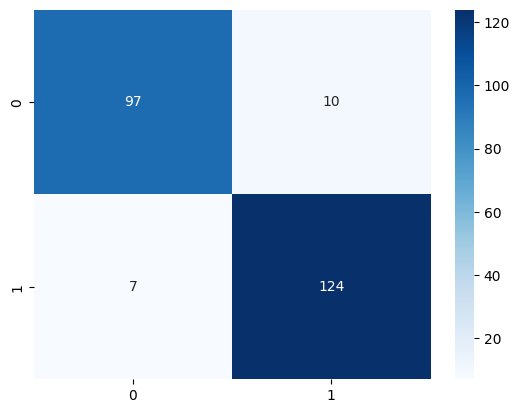

In [16]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()

In [17]:
# Create SQLite engine
engine = create_engine('sqlite:///patients.db', echo=False)

# Save dataframe to SQL
df.to_sql('patient_data', con=engine, if_exists='replace', index=False)

# Example query
query_result = pd.read_sql("SELECT * FROM patient_data LIMIT 5", con=engine)
query_result

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


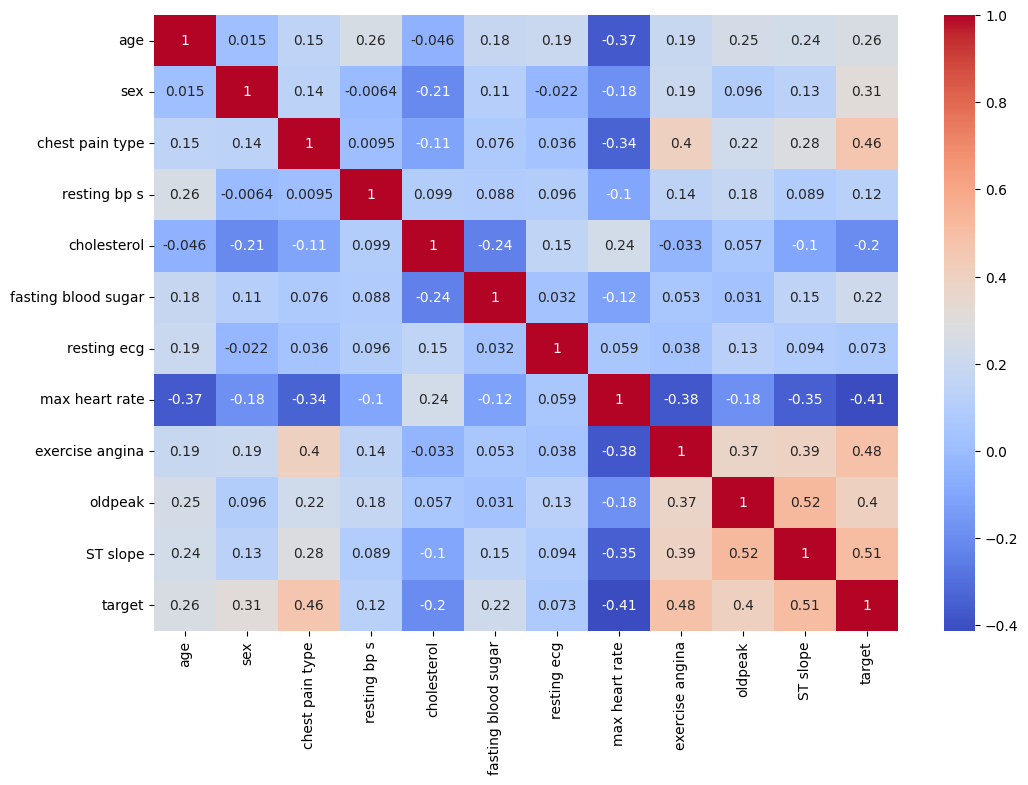

In [18]:
# Plot Age vs Target
fig = px.histogram(df, x='age', color='target', barmode='group', title="Patient Age vs Heart Disease")
fig.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [27]:
for col in X.columns:
    if col not in new_patient.columns:
        new_patient[col] = 0


new_patient = new_patient[X.columns]

print("Columns now match training data:")
print(new_patient.columns.tolist())

Columns now match training data:
['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']


In [25]:
new_patient_scaled = scaler.transform(new_patient)
risk_prediction = model.predict(new_patient_scaled)
print("High Risk" if risk_prediction[0]==1 else "Low Risk")

High Risk


In [26]:
new_patient = pd.DataFrame([{
    'age': 55,
    'sex': 1,
    'cp': 3,
    'trestbps': 140,
    'chol': 220,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 1.2,
    'slope': 2,
    'ca': 0,
    'thal': 2
}])

# 2. Automatically align columns with training data
for col in X.columns:
    if col not in new_patient.columns:
        new_patient[col] = 0   # add missing columns safely

# 3. Remove extra columns & reorder correctly
new_patient = new_patient[X.columns]

# 4. Scale using trained scaler
new_patient_scaled = scaler.transform(new_patient)

# 5. Predict risk
prediction = model.predict(new_patient_scaled)[0]
probability = model.predict_proba(new_patient_scaled)[0][1]

# 6. Output result
if prediction == 1:
    print("🔴 High Risk Patient")
else:
    print("🟢 Low Risk Patient")

print(f"Risk Probability: {probability:.2f}")

🔴 High Risk Patient
Risk Probability: 0.81


In [28]:
# Create synthetic patient visit data
np.random.seed(42)

visits = pd.DataFrame({
    'patient_id': np.random.randint(1, 101, 500),
    'visit_date': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(1, 365, 500), unit='D'),
    'treatment_cost': np.random.randint(500, 20000, 500)
})

visits.head()

,patient_id,visit_date,treatment_cost
0,52,2023-03-18,9159
1,93,2023-06-04,14543
2,15,2023-05-25,9337
3,72,2023-03-28,617
4,61,2023-07-05,14417


In [29]:
# Reference date
snapshot_date = visits['visit_date'].max() + pd.Timedelta(days=1)

raf = visits.groupby('patient_id').agg({
    'visit_date': lambda x: (snapshot_date - x.max()).days,
    'patient_id': 'count',
    'treatment_cost': 'sum'
})

raf.columns = ['Recency', 'Frequency', 'Monetary']

# Score each dimension
raf['R_score'] = pd.qcut(raf['Recency'], 4, labels=[4,3,2,1])
raf['F_score'] = pd.qcut(raf['Frequency'], 4, labels=[1,2,3,4])
raf['M_score'] = pd.qcut(raf['Monetary'], 4, labels=[1,2,3,4])

raf['RAF_Score'] = raf[['R_score','F_score','M_score']].astype(int).sum(axis=1)
raf.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RAF_Score
patient_id,,,,,,,
1,15,9,116445,4,4,4,12
2,15,10,103251,4,4,4,12
3,24,7,81309,3,3,4,10
4,51,5,40083,3,2,2,7
5,195,3,33988,1,1,2,4


In [33]:
!pip install streamlit

In [43]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

st.set_page_config(layout="wide")
st.title("Healthcare Patient Risk Dashboard")

df = pd.read_csv("heart.csv")

fig = px.histogram(df, x="age", color="target", title="Patient Risk Distribution")
st.plotly_chart(fig, use_container_width=True)

st.dataframe(df.head())

Overwriting app.py


In [44]:
!streamlit run app.py &>/content/logs.txt &

In [46]:
from google.colab import files

files.download("app.py")
files.download("heart.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import joblib
joblib.dump(model, "risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [48]:
from google.colab import files
files.download("risk_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import joblib

model = joblib.load("risk_model.pkl")
scaler = joblib.load("scaler.pkl")

In [50]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///hospital.db")
df.to_sql("patients", engine, if_exists="replace", index=False)

1190

In [51]:
files.download("hospital.db")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///hospital.db")
df = pd.read_sql("SELECT * FROM patients", engine)

In [54]:
import streamlit as st

In [55]:
st.subheader("New Patient Risk Prediction")

age = st.number_input("Age", 1, 120)
chol = st.number_input("Cholesterol", 50, 600)
trestbps = st.number_input("Blood Pressure", 80, 200)

if st.button("Predict Risk"):
    patient = pd.DataFrame([[age, chol, trestbps]], columns=["age","chol","trestbps"])
    patient_scaled = scaler.transform(patient)
    risk = model.predict(patient_scaled)[0]
    st.success("High Risk" if risk == 1 else "Low Risk")

2025-12-25 09:44:42.236 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-25 09:44:42.435 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-25 09:44:42.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-25 09:44:42.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-25 09:44:42.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-25 09:44:42.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-25 09:44:42.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-25 09:44:42.440 Thread 'MainThread': mi

In [56]:
df["risk_probability"] = model.predict_proba(X)[:,1]

In [57]:
df.to_sql("risk_scores", engine, if_exists="replace", index=False)

1190

In [58]:
high_risk = df[df["risk_probability"] > 0.8]
high_risk.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,risk_probability
304,62,0,4,120,0,1,1,123,1,1.7,3,1,0.939371
306,51,0,4,120,0,1,0,127,1,1.5,1,1,0.962231
322,63,1,4,100,0,1,0,109,0,-0.9,2,1,0.981233
323,38,0,4,105,0,1,0,166,0,2.8,1,1,0.968790
325,46,1,4,100,0,1,1,133,0,-2.6,2,1,0.976280


/tmp/ipython-input-189695882.py:6: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



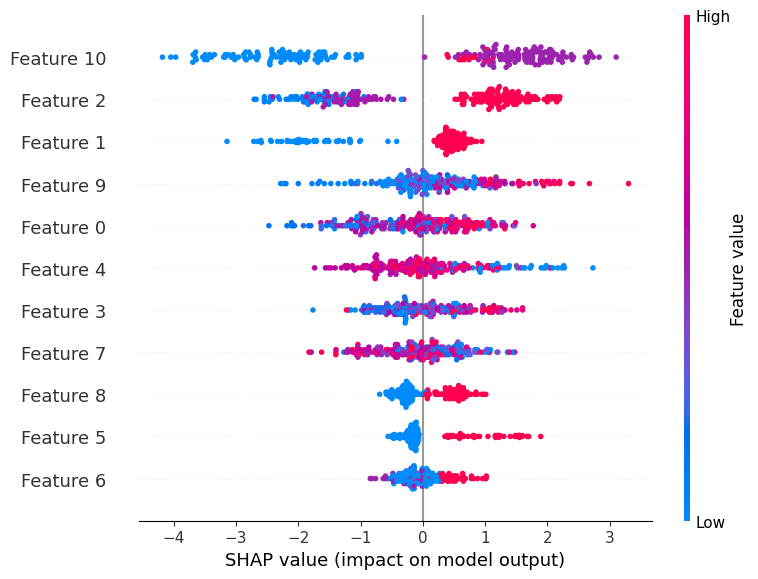

In [59]:
!pip install shap
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

## Healthcare Patient Risk Prediction System
- Python, SQL, ML
- Risk prediction & scoring
- Streamlit dashboard
- Cloud deployment